In [4]:
### Baseline DELG global feature for retrieval ###

### Code Adaptived from the Original Kernal ###
### https://www.kaggle.com/camaskew/host-baseline-example?scriptVersionId=40287695

import os
import pandas as pd
import numpy as np
import PIL
from scipy import spatial
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras import Model
import tensorflow.keras as keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input

In [5]:
INPUT_DIR = os.path.join('..', 'input')
DATASET_DIR = os.path.join(INPUT_DIR, 'landmark-retrieval-2021')
TEST_IMAGE_DIR = os.path.join(DATASET_DIR, 'test')
TRAIN_IMAGE_DIR = os.path.join(DATASET_DIR, 'train')

TOP_K = 100

# DELG model:
SAVED_MODEL_DIR = '../input/delg-saved-models/local_and_global'
#DELG_MODEL = tf.saved_model.load(SAVED_MODEL_DIR)
DELG_IMAGE_SCALES_TENSOR = tf.convert_to_tensor([0.70710677, 1.0, 1.4142135])
DELG_INPUT_TENSOR_NAMES = ['input_image:0', 'input_scales:0']

# Global feature extraction:
NUM_EMBEDDING_DIMENSIONS = 2048
#model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [6]:
def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
import imageio
from tqdm.notebook import tqdm
images_path = '../input/landmark-retrieval-2021/train'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10

image_paths = []
for root, dirs, files in os.walk(os.path.join(TRAIN_IMAGE_DIR,'1','7','6')):
    for file in files:
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))
        
#images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
#if max_num_images < len(images):
    #images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]
image_paths.sort()
print("keeping %d images to analyze" % len(image_paths))
DATASET_DIR = os.path.join(INPUT_DIR, 'landmark-retrieval-2021')

import matplotlib.pyplot as plt
train_images = []
for path in tqdm(image_paths):
    im = imageio.imread(path)
    #img, x = load_image(os.path.join(root[0],image_paths[0]))
    im = np.asarray(im)
    train_images = np.append(train_images, im)

keeping 409 images to analyze


  0%|          | 0/409 [00:00<?, ?it/s]

In [22]:
train_images.shape

(539109202,)

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [46]:
ids = []
# grab the image ID
for path in image_paths:
    id = path.split('/')[-1][:-4]
    ids.append(id)
train_labels = pd.read_csv(os.path.join(DATASET_DIR, 'train.csv'))
#ids.append('17660ef415d37059')
boool = train_labels.id.isin(ids)
new_df = train_labels[boool]
new_df
#train_labels
#print(ids)

,id,landmark_id
0,17660ef415d37059,1
165,1766bcbb04f86edf,27
1236,176fc008a980dc2e,139
1571,1761b8a6d75bb717,189
1629,176f67b70a6ba09f,192
...,...,...
1561749,176a5bcfe0128f5e,200714
1568528,176200cef677e6ff,201554
1569918,176068c63bdf7c30,201785
1570124,176aeeb82605981f,201840


In [63]:
for image in train_images:
    image = image/255

(600, 800, 3)
(533, 800, 3)
(600, 800, 3)
(600, 800, 3)
(533, 800, 3)
(594, 800, 3)
(554, 800, 3)
(600, 800, 3)
(532, 800, 3)
(600, 800, 3)
(533, 800, 3)
(622, 800, 3)
(800, 600, 3)
(473, 709, 3)
(600, 800, 3)
(533, 800, 3)
(420, 800, 3)
(628, 800, 3)
(799, 644, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(799, 600, 3)
(580, 800, 3)
(600, 800, 3)


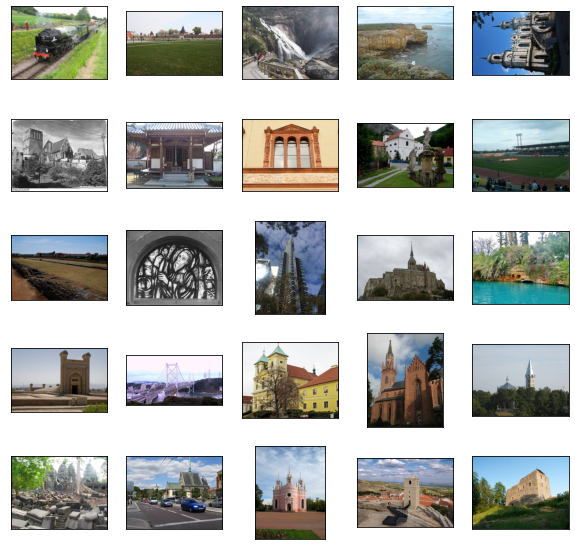

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    print(train_images[i].shape)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(new_df.landmark_id.iloc[i, :])
plt.show()

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [2]:
print(len(train_images))
print(len(new_df['landmark_id']))
print(type(train_images[0]))
item = tuple(map(tuple, train_images))
print(item)

NameError: name 'train_images' is not defined

In [67]:
X = np.array(train_images)
y = np.array(new_df['landmark_id'])
model.fit(X, y, epochs=10)

409
409
<class 'numpy.ndarray'>
[array([[[ 86, 110,  78],
        [ 67,  91,  59],
        [ 57,  80,  51],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 86, 110,  78],
        [ 72,  96,  64],
        [ 65,  88,  59],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 85, 109,  77],
        [ 76,  99,  70],
        [ 70,  93,  64],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 70,  51,  44],
        [ 71,  52,  45],
        [ 73,  54,  47],
        ...,
        [110, 150,  62],
        [109, 151,  65],
        [118, 160,  76]],

       [[ 59,  39,  32],
        [ 68,  49,  42],
        [ 79,  60,  53],
        ...,
        [123, 162,  79],
        [117, 159,  77],
        [125, 167,  85]],

       [[ 51,  31,  24],
        [ 68,  48,  41],
        [ 86,  67,  60],
        ...,
        [119, 161,  79],
        [123, 16

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
import time
tic = time.clock()
features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

In [ ]:
pca_features = pca.transform(features)

In [ ]:
pca_features

In [ ]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [ ]:
from scipy.spatial import distance

similar_idx = [distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [ ]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

In [ ]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
# %% [code] {"jupyter":{"outputs_hidden":false}}
### Baseline DELG global feature for retrieval ###

### Code Adaptived from the Original Kernal ###
### https://www.kaggle.com/camaskew/host-baseline-example?scriptVersionId=40287695


import os
import pandas as pd
import numpy as np
import PIL
from scipy import spatial
import tensorflow as tf

INPUT_DIR = os.path.join('..', 'input')

DATASET_DIR = os.path.join(INPUT_DIR, 'landmark-retrieval-2021')
TEST_IMAGE_DIR = os.path.join(DATASET_DIR, 'test')
TRAIN_IMAGE_DIR = os.path.join(DATASET_DIR, 'index')

TOP_K = 100

# DELG model:
#SAVED_MODEL_DIR = '../input/delg-saved-models/local_and_global'
#DELG_MODEL = tf.saved_model.load(SAVED_MODEL_DIR)
model = keras.applications.VGG16(weights='imagenet', include_top=True)
ye = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
DELG_MODEL = ye
DELG_IMAGE_SCALES_TENSOR = tf.convert_to_tensor([0.70710677, 1.0, 1.4142135])
DELG_INPUT_TENSOR_NAMES = ['input_image:0', 'input_scales:0']

# Global feature extraction:
NUM_EMBEDDING_DIMENSIONS = 2048
GLOBAL_FEATURE_EXTRACTION_FN = DELG_MODEL.prune(DELG_INPUT_TENSOR_NAMES, ['global_descriptors:0'])

def to_hex(image_id) -> str:
    return '{0:0{1}x}'.format(image_id, 16)

def get_image_path(subset, image_id):
    name = to_hex(image_id)
    return os.path.join(DATASET_DIR, subset, name[0], name[1], name[2], '{}.jpg'.format(name))

def load_image_tensor(image_path):
    return tf.convert_to_tensor(np.array(PIL.Image.open(image_path).convert('RGB')))

def extract_global_features(image_root_dir):
    # get paths of all images
    image_paths = []
    for root, dirs, files in os.walk(image_root_dir):
        for file in files:
            if file.endswith('.jpg'):
                 image_paths.append(os.path.join(root, file))
                    
    num_embeddings = len(image_paths)

    ids = num_embeddings * [None]
    ids = []
    # grab the image ID
    for path in image_paths:
        ids.append(path.split('/')[-1][:-4])
    
    embeddings = np.empty((num_embeddings, NUM_EMBEDDING_DIMENSIONS))
    for i, image_path in enumerate(image_paths):
        image_tensor = load_image_tensor(image_path)
        embedding_tensor = tf.nn.l2_normalize(GLOBAL_FEATURE_EXTRACTION_FN(image_tensor, DELG_IMAGE_SCALES_TENSOR)[0], axis=1, name='l2_normalization')
        embedding_tensor = tf.reduce_sum(embedding_tensor, axis=0, name='sum_pooling')
        embeddings[i, :] = tf.nn.l2_normalize(embedding_tensor, axis=0, name='final_l2_normalization').numpy()

    return ids, embeddings

def get_predictions():
    test_ids, test_embeddings = extract_global_features(TEST_IMAGE_DIR)
    train_ids, train_embeddings = extract_global_features(TRAIN_IMAGE_DIR)

    PredictionString_list = []
    for test_index in range(test_embeddings.shape[0]):
        distances = spatial.distance.cdist(test_embeddings[np.newaxis, test_index, :], train_embeddings, 'cosine')[0]
        partition = np.argpartition(distances, TOP_K)[:TOP_K]
        nearest = sorted([(train_ids[p], distances[p]) for p in partition], key=lambda x: x[1])
        pred_str = ""
        for train_id, cosine_distance in nearest:
            pred_str += train_id
            pred_str += " "
        PredictionString_list.append(pred_str)

    return test_ids, PredictionString_list

def main():
    test_image_list = []
    for root, dirs, files in os.walk(TEST_IMAGE_DIR):
        for file in files:
            if file.endswith('.jpg'):
                 test_image_list.append(os.path.join(root, file))
                    
    if len(test_image_list)==1129:
        sub_df = pd.read_csv('../input/landmark-retrieval-2021/sample_submission.csv')
        sub_df.to_csv('submission.csv', index=False)
        return
    
    test_ids, PredictionString_list = get_predictions()
    sub_df = pd.DataFrame(data={'id': test_ids, 'images': PredictionString_list})
    sub_df.to_csv('submission.csv', index=False)

if __name__ == '__main__':
    main()